# 1. Sample Data and Stacking Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
from sklearn.datasets import make_regression

data, label = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
data.shape, label.shape

((1000, 20), (1000,))

### 1.2 EDA

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

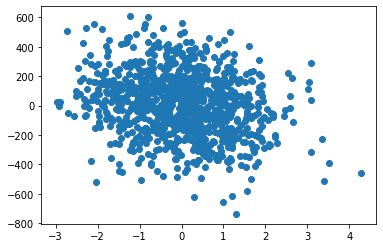

In [4]:
pca_data = pca.fit_transform(data)
plt.scatter(pca_data, label)

### 1.3 Split

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size=0.7, random_state=2021)

# 2. Performance of Individual Models
- KNN
- DT
- SVM

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [7]:
models = {
    'knn': KNeighborsRegressor(),
    'tree': DecisionTreeRegressor(),
    'svm': SVR(),
}

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [9]:
names = []
results = []
for name, model in models.items():
    result = cross_val_score(model, train_data, train_label, cv=3, scoring="neg_mean_absolute_error")
    names += [name]
    results += [result]

In [10]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [11]:
results

[array([-105.03162689, -105.83152462, -102.13684464]),
 array([-171.09231453, -157.80562509, -155.03744475]),
 array([-169.94710581, -171.22395842, -162.4710332 ])]

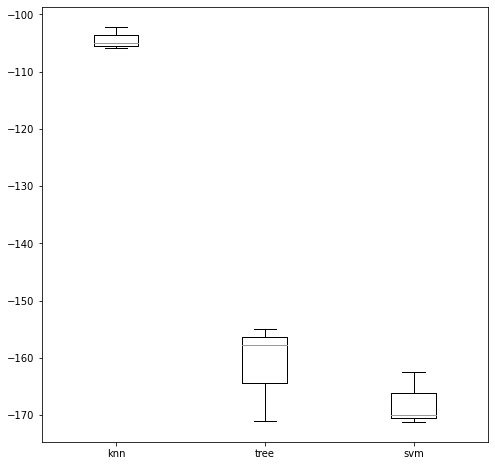

In [12]:
plt.figure(figsize=(8, 8))
plt.boxplot(results, labels=names)
plt.show()

In [13]:
for name, model in models.items():
    model.fit(train_data, train_label)
    test_pred = model.predict(test_data)
    acc = mean_absolute_error(test_label, test_pred)
    print(f"Model {name} test mean absoulte erorr is {acc:.4}")

Model knn test mean absoulte erorr is 97.77
Model tree test mean absoulte erorr is 163.1
Model svm test mean absoulte erorr is 162.6


# 3. Stacking

In [14]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [15]:
stacking = StackingRegressor(
    estimators=list(models.items()),
    final_estimator=LinearRegression(),
    cv=3
)

In [16]:
stacking_result = cross_val_score(stacking, train_data, train_label, cv=3, scoring="neg_mean_absolute_error")
stacking_result

array([-94.97206554, -84.45480069, -92.83596969])

In [17]:
all_result = []
all_result.extend(results)
all_result.append(stacking_result)

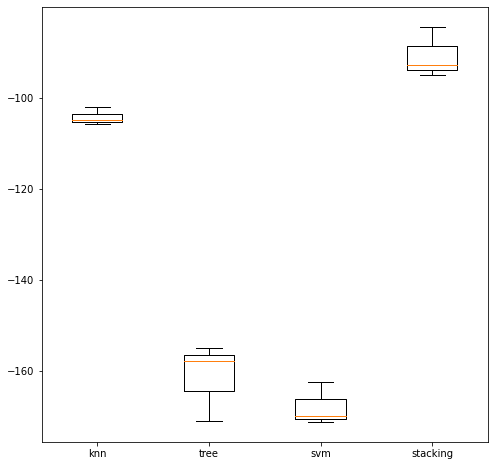

In [18]:
plt.figure(figsize=(8, 8))
plt.boxplot(all_result, labels=names + ["stacking"])
plt.show()

In [19]:
for name, model in models.items():
    test_pred = model.predict(test_data)
    acc = mean_absolute_error(test_label, test_pred)
    print(f"Model {name} test mean absoulte erorr is {acc:.4}")

stacking.fit(train_data, train_label)
stacking_pred = stacking.predict(test_data)
stacking_mae = mean_absolute_error(test_label, stacking_pred)
print(f"Model stacking mean absoulte erorr is {stacking_mae:.4}")

Model knn test mean absoulte erorr is 97.77
Model tree test mean absoulte erorr is 163.1
Model svm test mean absoulte erorr is 162.6
Model stacking mean absoulte erorr is 83.61
